In [1]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TreebankWordTokenizer
import spacy
from nltk.corpus import stopwords

In [14]:
train=pd.read_csv('train.csv')

In [15]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [16]:
train.shape

(7613, 5)

In [17]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [18]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [19]:
train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [20]:
train.target.unique()

array([1, 0], dtype=int64)

In [21]:
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

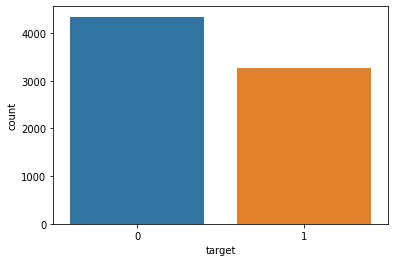

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(train.target)

# Clean text

In [23]:
import re
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(document):
    return TAG_RE.sub('', document)


def clean(doc):
    doc=doc.lower()
    document = remove_tags(doc)
    document = re.sub('[^a-zA-Z]', ' ', document)
    document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)
    document = re.sub(r'\s+', ' ', document)
    
    return document

In [24]:
train['clean_text']=train['text'].apply(clean)

In [25]:
train['clean_text'][0]

'our deeds are the reason of this earthquake may allah forgive us all'

In [26]:
train.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [27]:
train['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [28]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [29]:
train[train["target"] == 1]["clean_text"].values[1]

'forest fire near la ronge sask canada'

In [30]:
train[train['target']==0]["clean_text"].values[0]

'what up man '

In [31]:
train[train['target']==1]["clean_text"].values[0]

'our deeds are the reason of this earthquake may allah forgive us all'

##### Count the number words in each tweet

In [32]:
count_vector=feature_extraction.text.CountVectorizer()
# from the first 10 tweets
train_d=count_vector.fit_transform(train["clean_text"][0:10])

In [33]:
print('There are ',train_d[0].todense().shape[1] ,'unique words in the first 10 words')

There are  95 unique words in the first 10 words


In [34]:
print(train_d.todense())

[[0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 2 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
  0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 2 0 0 0 0 1
  0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 2 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
  0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0

In [35]:
train_df=count_vector.fit_transform(train["clean_text"])

In [36]:
print('There are ',train_df.todense().shape[1],'unique words')

There are  22101 unique words


#### Model

In [37]:
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
clf=linear_model.RidgeClassifier()

In [43]:
lr=linear_model.LinearRegression()

In [38]:
# from sklearn.ensemble import StackingClassifier
# multi_layer = StackingClassifier(estimators=[('KNclassifier', KNeighborsClassifier()),
#                                                       ('multi', MultinomialNB()),('sgd', SGDClassifier()),('random_forest',RandomForestClassifier())],
#                                                                                                  final_estimator=clf)
# multi_layer.fit(train_df,train['target'])

In [39]:
# score_s=model_selection.cross_val_score(multi_layer,train_df,train['target'])

In [40]:
# score_s

In [13]:
# sample_submission = pd.read_csv("sample_submission.csv")
# sample_submission["target"] = multi_layer.predict(test_v)
# sample_submission.head()

In [51]:
# sample_submission.to_csv('sub6.csv',index=None)

# Stacking Random Forest

In [76]:
rf=RandomForestClassifier(n_estimators=300,max_samples=13)
rf1=RandomForestClassifier(n_estimators=140,max_samples=16)
rf2=RandomForestClassifier(n_estimators=59,max_samples=19)
rf3=RandomForestClassifier(n_estimators=160,max_samples=20)
rf4=RandomForestClassifier(n_estimators=170,max_samples=23)

In [79]:
from sklearn.ensemble import StackingClassifier
multi_layer = StackingClassifier(estimators=[('rf',rf),('rf1',rf1),('rf2',rf2),('rf3',rf3),('rf4',rf4)],final_estimator=clf)

In [80]:
multi_layer.fit(train_df,train['target'])

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_samples=13,
                                                       n_estimators=300)),
                               ('rf1',
                                RandomForestClassifier(max_samples=16,
                                                       n_estimators=140)),
                               ('rf2',
                                RandomForestClassifier(max_samples=19,
                                                       n_estimators=59)),
                               ('rf3',
                                RandomForestClassifier(max_samples=20,
                                                       n_estimators=160)),
                               ('rf4',
                                RandomForestClassifier(max_samples=23,
                                                       n_estimators=170))],
                   final_estimator=RidgeClassifier())

In [81]:
score_s=model_selection.cross_val_score(multi_layer,train_df,train['target'])

In [82]:
score_s

array([0.63558766, 0.64478004, 0.63952725, 0.64651774, 0.69250986])